In [53]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
GM = 398600.4415 #Km^3 s^-2
# Re = 6378.137 #Km

In [54]:
#Numerical integration of a simple force model for orbit predicition
    # Using RK 4-step integration with monopole gravity model 
    
    #Scheme as follows:
        # Given y''= f (x,y,y'') with initial conditions (x0,y0,y'0)
        # Given h = stepsize (we define this)
        
        #Evaluate k1,k2,k3,k4:
        
            #k1 = 1/2h^2 f(x0,y0,y'0) = 1/2 h^2(y''0)
            #k2 = 1/2h^2 f(x0 + 1/2h, y0+1/2h y'0 + 1/4k1,y'0 + k1/h)
            #k3 = 1/2h^2 f(x0 + 1/2h, y0+1/2h y'0 + 1/4k1,y'0 + k2/h)
            #k3 = 1/2h^2 f(x0 + h, h y'0 + k3, y'0 + 2 k3 /h)
        
        
        #Determine P and Q:
        
            # P = 1/3(k1+k2+k3)
            # Q = 1/3(k1+2k2+2k3+k4)
        
        #Calculate y(x0+h):
        
            #x1 = x0+h
            #y1 = y0+h y'0 +P
            #y'1 = y'0 + Q/h

In [55]:
#Define Stepsize 
h = 600 #seconds

In [56]:
#Initial conditions (taken from ground tracks programme)

x0= -7134.401598
y0 = -1344.205350
z0 = 2616.199171
u0 = 2.737023
v0 = -2.641275
w0 = 2.737023

In [57]:
r0 = np.sqrt (x0**2 + y0**2 + z0**2)
print(r0)

7716.934124822802


In [58]:
#Instead of the dependent variable y in the basic RK4, we have three
#dependent variables (x,y,z) and our independent variable is t instead of x

k1_x = (1/2 * (h**2)) * (-GM*x0)/(r0**3)
k1_y = (1/2 * (h**2)) * (-GM*y0)/(r0**3)
k1_z = (1/2 * (h**2)) * (-GM*z0)/(r0**3)

print(k1_x)
print(k1_y)
print(k1_z)

1113.8672987339796
209.86572757104042
-408.45734060846274


In [59]:
#Then for k2 we find x,y,z at h/2

xk2 = x0 + ((h/2) * u0) + (k1_x/4)
yk2 = y0 + ((h/2) * v0) + (k1_y/4)
zk2 = z0 + ((h/2) * w0) + (k1_z/4) 
#This gives us r_k2

r_k2 = np.sqrt((xk2**2) + (yk2**2) + (zk2**2))
#check this is the right r needed (i.e. magnitude not state vector) - this is fine

# This is the bit inside the function (the first 'r' in -GM*r/r**3)
# k2 = 1/2 * h**2 * f(....)              
# where our f is -GM*X/r**3         
# This comes from r_dot_dot = -GM*r/r**3

# are we not missing things here ?
# i thought it was meant to be:
# x0 + 1/2h y0 + 1/2h y'0 + 1/4k1, y0 + k1/h

# we only use:
# x0 + 1/2h y'0 + 1/4 k1

# we are missing:
#1/2h y0 + y0 + k1/h 
# do these cancel or something? NO
# y' does not appear in the force function and hence we do not predict velocities for intermediate steps

# i thought x,y,z = y 
# and u,v,w, = y' 
# but we seem to be including uvw and not xyz
# MAYBE we are using uvw to find out our new xyz over a small time step

#WAIT I think its cos this is first order ? OK i dont think so anymore cos we are using 1/2 h**2...

print(xk2,yk2,zk2)
print(r_k2)

#Z already looks quite 'off' at this stage but i cant see any errors
#could be wrong in the Orbit_prop 

-6034.827873316506 -2084.1214181072396 3335.191735847885
7203.20855319622


In [60]:
#Now we plug this bit into the main body of the function 
#and we get k2 for each dimension

k2_x = (1/2) * (h**2) * ((-GM*xk2)/(r_k2)**3)
k2_y = (1/2) * (h**2) * ((-GM*yk2)/(r_k2)**3)
k2_z = (1/2) * (h**2) * ((-GM*zk2)/(r_k2)**3)

print(k2_x,k2_y,k2_z)

1158.5031021454843 400.08782003556786 -640.2552074954785


In [61]:
#Now we repeat the same thing for k3
    # get the part inside the function
    # then plug into the wider body
    
xk3 = x0 + (h/2 * u0) + (k2_x/4)
yk3 = y0 + (h/2 * v0) + (k2_y/4)
zk3 = z0 + (h/2 * w0) + (k2_z/4)

#this gives us rk_3

r_k3 = np.sqrt((xk3**2) + (yk3**2) + (zk3**2))

print (xk3,yk3,zk3)
print(r_k3)

-6023.668922463629 -2036.5658949911078 3277.242269126131
7153.49598606458


In [62]:
k3_x = 1/2 * (h**2) * ((-GM*xk3)/(r_k3)**3)
k3_y = 1/2 * (h**2) * ((-GM*yk3)/(r_k3)**3)
k3_z = 1/2 * (h**2) * ((-GM*zk3)/(r_k3)**3)

print (k3_x,k3_y,k3_z)

1180.636922422869 399.16617621645116 -642.3382952250191


In [63]:
#On to k4

xk4 = (x0 + (h*u0) + 2*k3_x /h)
yk4 = (y0 + (h*v0) + 2*k3_y /h)
zk4 = (z0 + (h*w0) + 2*k3_z /h)

#the 'entire' formula is f(x0 + h*y0 +h*y'0 + k3*y'0 +2*k3/h)
#this gives us r_k4
r_k4 = np.sqrt(xk4**2 + yk4**2 + zk4**2)

print (xk4,yk4,zk4)
print(r_k4)

-5488.252341591924 -2927.6397960792783 4256.271843349251
7537.097488096063


In [64]:
k4_x = 1/2 * (h**2) * ((-GM*xk4)/(r_k4)**3)
k4_y = 1/2 * (h**2) * ((-GM*yk4)/(r_k4)**3)
k4_z = 1/2 * (h**2) * ((-GM*zk4)/(r_k4)**3)

print(k4_x,k4_y,k4_z)

919.6698602917164 490.5864225375109 -713.2261215236271


In [65]:
K = [[k1_x,k2_x,k3_x,k4_x],
     [k1_y,k2_y,k3_y,k4_y],
     [k1_z,k2_z,k3_z,k4_z]]

print("All K's=",K)

All K's= [[1113.8672987339796, 1158.5031021454843, 1180.636922422869, 919.6698602917164], [209.86572757104042, 400.08782003556786, 399.16617621645116, 490.5864225375109], [-408.45734060846274, -640.2552074954785, -642.3382952250191, -713.2261215236271]]


In [66]:
#Calculate P(x),P(y),P(z),Q(x),Q(y),Q(z)

P_x = 1/3 * (k1_x+k2_x+k3_x)
Q_x = 1/3 * (k1_x+2*k2_x+2*k3_x+k4_x)

P_y = 1/3 * (k1_y+k2_y+k3_y)
Q_y = 1/3 * (k1_y+2*k2_y+2*k3_y+k4_y)

P_z = 1/3 * (k1_z+k2_z+k3_z)
Q_z = 1/3 * (k1_z+2*k2_z+2*k3_z+k4_z)

print('P(x)=',P_x,
      '\nP(y)=',P_y,
      '\nP(z)=',P_z,
      '\nQ(x)=',Q_x,
      '\nQ(y)=',Q_y,
      '\nQ(z)=',Q_z,
                 )

P(x)= 1151.0024411007776 
P(y)= 336.3732412743531 
P(z)= -563.6836144429868 
Q(x)= 2237.272402720801 
Q(y)= 766.3200475375297 
Q(z)= -1228.9568225243618


In [67]:
#Applying our calculated values of P and Q

x_1 = x0 + h * u0 + P_x
y_1 = y0 + h * v0 + P_y
z_1 = z0 + h * w0 + P_z

u_1 = u0 + Q_x/h
v_1 = v0 + Q_y/h
w_1 = w0 = Q_z/h

print  ('x_1=', x_1,
        '\ny_1=', y_1,
        '\nz_1=', z_1,
        '\nu_1=', u_1,
        '\nv_1=', v_1,
        '\nw_1=', w_1,)
#is P(x) some kind of correction/precision factor that we apply to our new value of x 
# which is just our initial position + our time step* our velocity in that direction
#same for Q(x) except with regards to velocity

##############
#Results are very close to keplerian method although z_1 and w_1 seems a bit fucked - find where this is coming from
##############

x_1= -4341.185356899223 
y_1= -2592.5971087256466 
z_1= 3694.729356557014 
u_1= 6.465810337868001 
v_1= -1.3640749207707836 
w_1= -2.048261370873936


In [68]:
### TODO ### 
# Put this in a for-loop that iterates over however many time steps we want
# compare to 'analytical' appraoch
# plot both on the same map
# plot both 'live' as little gif animations I can export 

In [110]:
####TESTING FOR FORLOOP######

In [150]:
x0 = -7134.401598
y0 = -1344.205350
z0 = 2616.199171

u0 = 2.737023
v0 = -2.641275
w0 = 6.099438

In [151]:
#creating empty lists in which the xyz and uvw coordinates will be appended for each new time step - h
#the 0s are so that i can plot the centre of mass of the Earth
rk4_x = [0,x0]
rk4_y = [0,y0]
rk4_z = [0,z0]
rk4_u = [0,u0]
rk4_v = [0,v0]
rk4_w = [0,w0]

print(rk4_z)

#starting with the x0,y0,z0 ... values as these are the ones I want to use initially 

[0, 2616.199171]


In [152]:
P=1
#P is going to be my indicator of what pass of the loop we are in: so I am initiating it at 0
# and I will increase P by one at the end of each loop

#Define Stepsize 
#compute every 10 mins for 1 hours  
for h in range (1,6000,10):

    r0 = np.sqrt (((rk4_x[P]) **2) + ((rk4_y[P])**2) + ((rk4_z[P])**2))
#for each time step I want it to grab the latest calculated value of r0 and use that to run the new calculation
# e.g rk4_y changes with evey loop and eveytime it is computed it is used in the following pass.

#Instead of the dependent variable y in the basic RK4, we have three
#dependent variables (x,y,z) and our independent variable is t instead of x
    k1_x = (1/2 * (h**2)) * (-GM*rk4_x[P]) / (r0**3)
    k1_y = (1/2 * (h**2)) * (-GM*rk4_y[P]) / (r0**3)
    k1_z = (1/2 * (h**2)) * (-GM*rk4_z[P]) / (r0**3)
    
#    print(k1_x)
#    print(k1_y)
#    print(k1_z)
    
    #Then for k2 we find x,y,z at h/2
    xk2 = rk4_x[P] + ((h/2) * rk4_u[P]) + (k1_x/h)
    yk2 = rk4_y[P] + ((h/2) * rk4_v[P]) + (k1_y/h)
    zk2 = rk4_z[P] + ((h/2) * rk4_w[P]) + (k1_z/h) 
    
#     print(xk2)
#     print(yk2)
#     print(zk2)

    #This gives us r_k2
    r_k2 = np.sqrt((xk2**2) + (yk2**2) + (zk2**2))
    
# print (r_k2)
# print(r0)
#These are comparable - seems ok

    #Now we plug this bit into the main body of the function 
    #and we get k2 for each dimension
    k2_x = ((1/2) * (h**2)) * ((-GM*xk2) / (r_k2)**3)
    k2_y = ((1/2) * (h**2)) * ((-GM*yk2) / (r_k2)**3)
    k2_z = ((1/2) * (h**2)) * ((-GM*zk2) / (r_k2)**3)

#     print(k2_x)
#     print(k2_y)
#     print(k2_z)  

    #Now we repeat the same thing for k3
    # get the part inside the function
    # then plug into the wider body
    xk3 = rk4_x[P] + ((h/2) * rk4_u[P]) + (k2_x/h)
    yk3 = rk4_y[P] + ((h/2) * rk4_v[P]) + (k2_y/h)
    zk3 = rk4_z[P] + ((h/2) * rk4_w[P]) + (k2_z/h)
    
        #this gives us rk_3
    r_k3 = np.sqrt((xk3**2) + (yk3**2) + (zk3**2))
    
#     print(r_k3)
    
    #Now we plug this bit into the main body of the function 
    #and we get k3 for each dimension
    k3_x = 1/2 * (h**2) * ((-GM*xk3)/(r_k3)**3)
    k3_y = 1/2 * (h**2) * ((-GM*yk3)/(r_k3)**3)
    k3_z = 1/2 * (h**2) * ((-GM*zk3)/(r_k3)**3)

#     print(k3_x)
#     print(k3_y)
#     print(k3_z)  
    

    #On to k4
    xk4 = rk4_x[P] + (h*rk4_u[P]) + (2*(k3_x /h))
    yk4 = rk4_y[P] + (h*rk4_v[P]) + (2*(k3_y /h))
    zk4 = rk4_z[P] + (h*rk4_w[P]) + (2*(k3_z /h))
    
    #this gives us r_k4
    r_k4 = np.sqrt(xk4**2 + yk4**2 + zk4**2)
#     print(r_k4)

    #Now we plug this bit into the main body of the function 
    #and we get k3 for each dimension
    k4_x = 1/2 * (h**2) * ((-GM*xk4)/(r_k4)**3)
    k4_y = 1/2 * (h**2) * ((-GM*yk4)/(r_k4)**3)
    k4_z = 1/2 * (h**2) * ((-GM*zk4)/(r_k4)**3)
    
#     print(k4_x)
#     print(k4_y)
#     print(k4_z)      

    #Calculate P(x),P(y),P(z),Q(x),Q(y),Q(z)
    P_x = 1/3 * (k1_x+k2_x+k3_x)
    Q_x = 1/3 * (k1_x+2*k2_x+2*k3_x+k4_x)
    
#     print(P_x)
#     print(Q_x)
    
    P_y = 1/3 * (k1_y+k2_y+k3_y)
    Q_y = 1/3 * (k1_y+2*k2_y+2*k3_y+k4_y)
    
#     print(P_y)
#     print(Q_y)
    
    P_z = 1/3 * (k1_z+k2_z+k3_z)
    Q_z = 1/3 * (k1_z+2*k2_z+2*k3_z+k4_z)
    
#     print(P_z)
#     print(Q_z)
    
    #Applying our calculated values of P and Q
    x_1 = (rk4_x[P]) + ((h * rk4_u[P])) + (P_x)
    y_1 = (rk4_y[P]) + ((h * rk4_v[P])) + (P_y)
    z_1 = (rk4_z[P]) + ((h * rk4_w[P])) + (P_z)
    
#     print(x_1)
#     print(y_1)
#     print(z_1)
    
#     print(x0)
#     print(y0)
#     print(z0)
    #So far so good 
    
    #Appending new xyz values to the pre-made empty lists
    rk4_x.append(x_1)
    rk4_y.append(y_1)
    rk4_z.append(z_1)

    
#     print(rk4_y) #we can see it is appending correctly here
#     print(rk4_x)
#     print(rk4_z)
    
    u_1 = (rk4_u[P]) + (Q_x/h)
    v_1 = (rk4_v[P]) + (Q_y/h)
    w_1 = (rk4_w[P]) + (Q_z/h)
    
    
    #Appending new uvw values to the pre-made empty lists
    rk4_u.append(u_1)
    rk4_v.append(v_1)
    rk4_w.append(w_1)
    
#     print(u0)
#     print(v0)
#     print(w0)    
    
#     print(u_1)
#     print(v_1)
#     print(w_1)
    
        
#     print(x_1)
#     print(y_1)
#     print(z_1)
    
    #making the newly caclulated value of xyz equals to the 'old one'
    x_1 = rk4_x[P]
    y_1 = rk4_y[P]
    z_1 = rk4_z[P]
    
    u_1 = rk4_u[P]
    v_1 = rk4_v[P]
    w_1 = rk4_w[P]

    # it doesnt change anything whether i leave the cells above in or not ??

    #there is a problem here it is replacing the value of x_1 with x0
    #what I want is for the x1 to be used as x0 next run
    # I think I can just remove this step as it the code is already appending my value x_1 to the rk4_x list and then selecting the right one
    
    P+=1
    

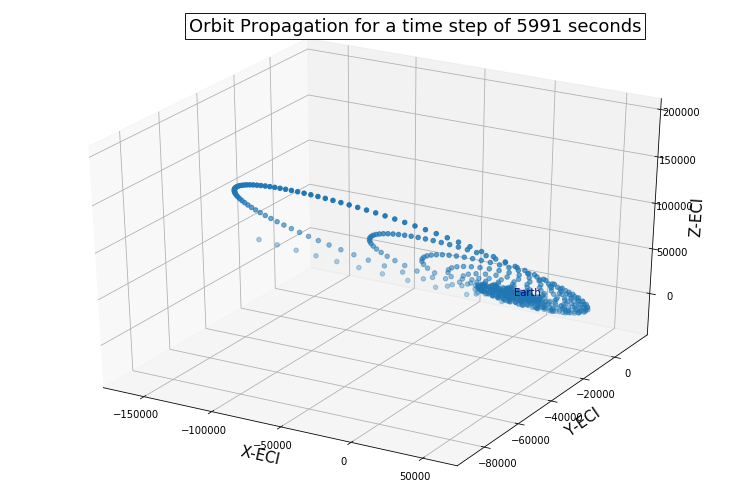

In [153]:
#Plot onto figure

fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(projection='3d')
xdata = [rk4_x[0:h]]
ydata = [rk4_y[0:h]] 
zdata = [rk4_z[0:h]] 

ax.scatter3D(xdata, ydata, zdata)
ax.set_xlabel('X-ECI',fontsize=15)
ax.set_ylabel('Y-ECI',fontsize=15)
ax.set_zlabel('Z-ECI',fontsize=15)
ax.text(0, 0, 0, "Earth", color='navy')
#This adjusts the title in accordance with the selected time step
ax.text2D(0.25, 0.95, "Orbit Propagation for a time step of %i seconds" %h, transform=ax.transAxes,fontname="Console",fontsize=18,bbox=dict(facecolor='white', alpha=0.9))
plt.show()